In [31]:
import pandas as pd
import numpy as np

In [192]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")


In [193]:
# df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()})

In [194]:
df

x1   x2   x3          x4   x5
0     1  0.1  1.0  2019-01-01  NaN
1     2  NaN  NaN  2019-01-02    B
2     3  NaN  3.0  2019-01-03    C
3  <NA>  0.4  4.0  2019-01-04    A
4     5  0.5  5.0  2019-01-05    B
5  <NA>  NaN  NaN  2019-01-06    C
6     7  0.7  7.0         NaN    A
7     8  0.8  8.0  2019-01-08    B
8     9  0.9  NaN  2019-01-09    C

In [42]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [44]:
!pip install missingno

In [55]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
help(msno.bar)

Help on function bar in module missingno.missingno:

bar(df, figsize=(24, 10), fontsize=16, labels=None, log=False, color='dimgray', inline=False, filter=None, n=0, p=0, sort=None, ax=None)
    A bar chart visualization of the nullity of the given DataFrame.
    
    :param df: The input DataFrame.
    :param log: Whether or not to display a logorithmic plot. Defaults to False (linear).
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default).
    :param n: The cap on the number of columns to include in the filtered DataFrame.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame.
    :param sort: The column sort order to apply. Can be "ascending", "descending", or None.
    :param figsize: The size of the figure to display.
    :param fontsize: The figure's font size. This default to 16.
    :param labels: Whether or not to display the column names. Would need to be turned off on particularly large
    d

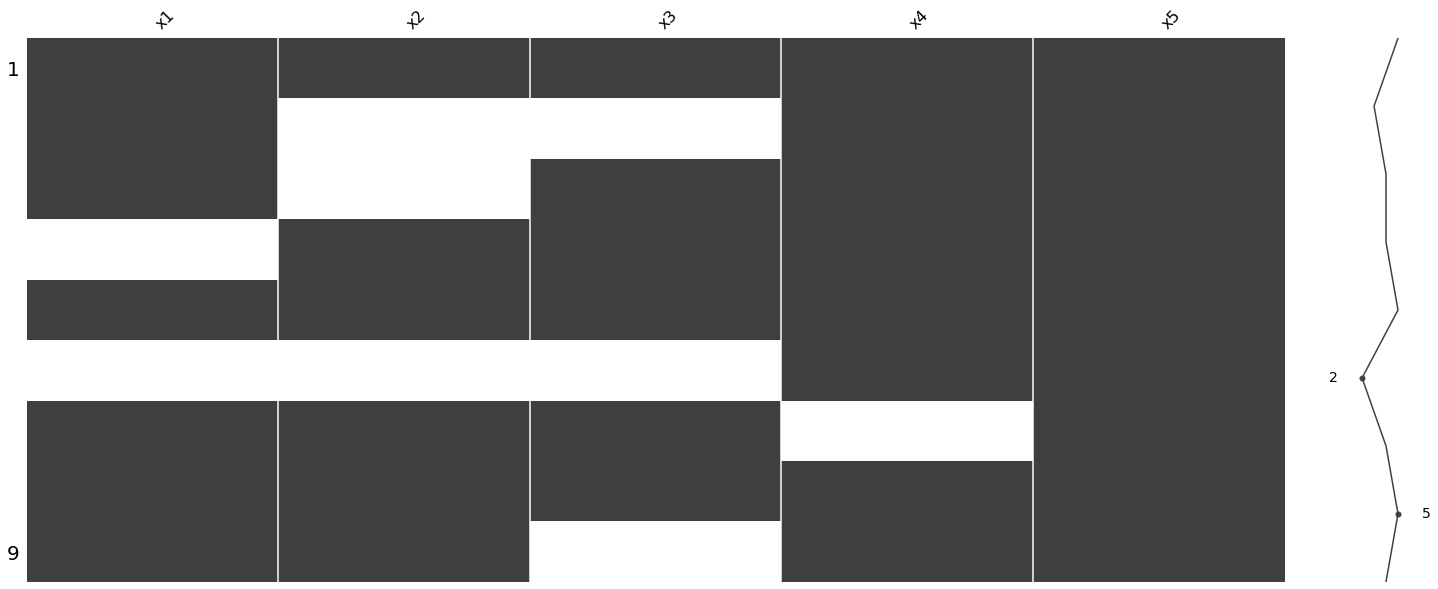

In [52]:
msno.matrix(df)
plt.show()

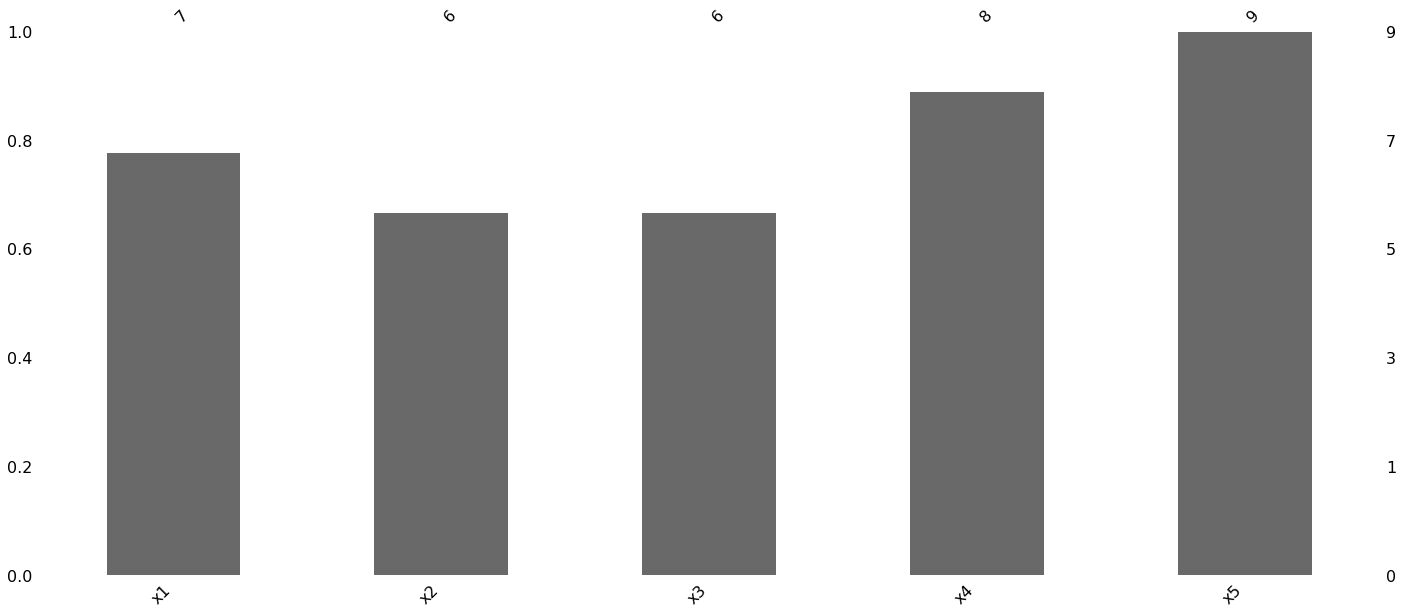

In [54]:
msno.bar(df)
plt.show()

In [56]:
titanic = sns.load_dataset("titanic")
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

<Figure size 360x144 with 0 Axes>

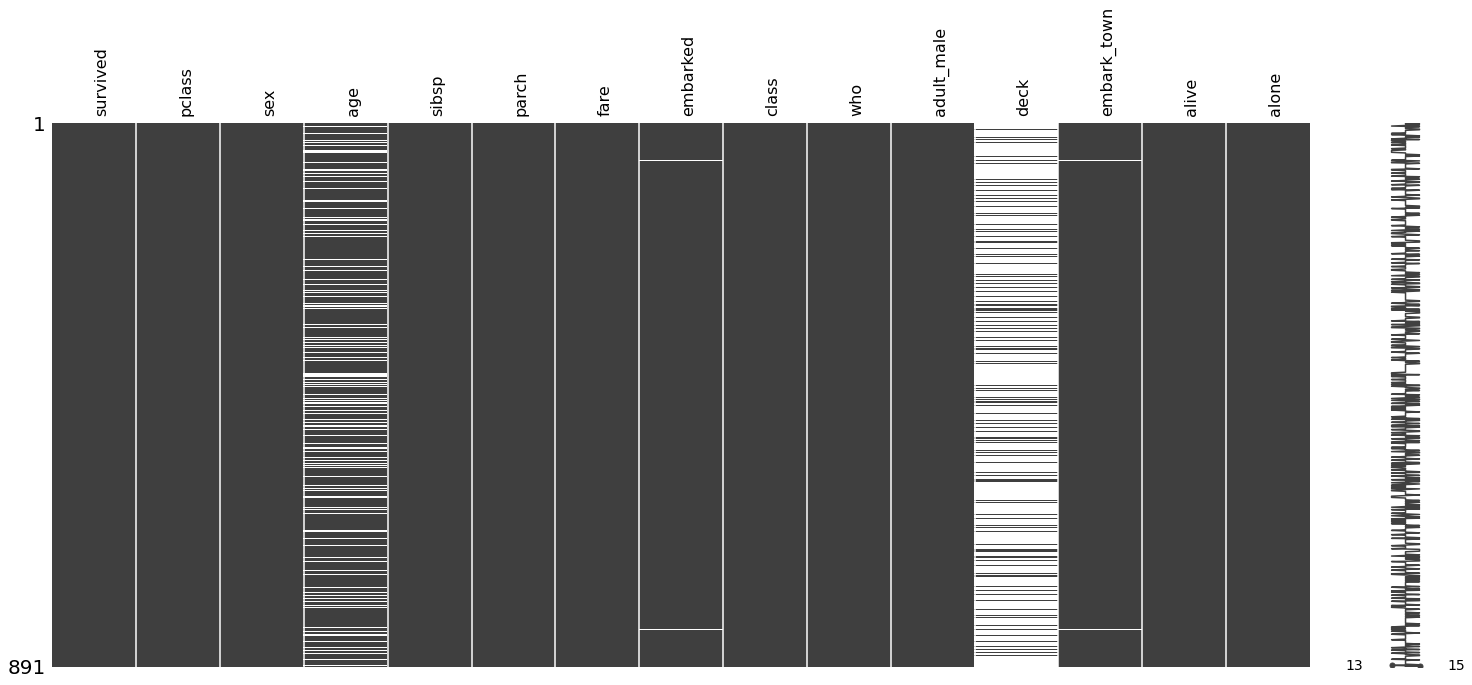

In [62]:
plt.figure(figsize=(5,2))
msno.matrix(titanic)
plt.xticks(rotation=90)
plt.show()

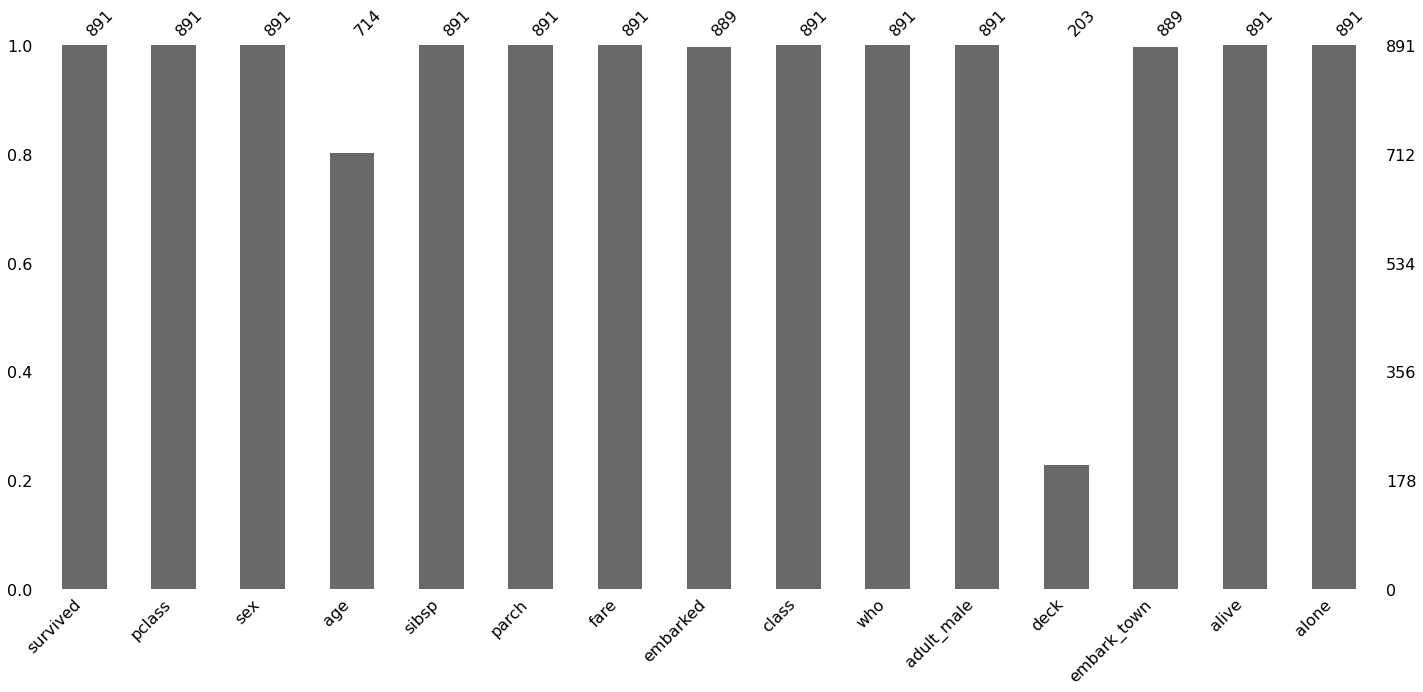

In [63]:
msno.bar(titanic)
plt.show()

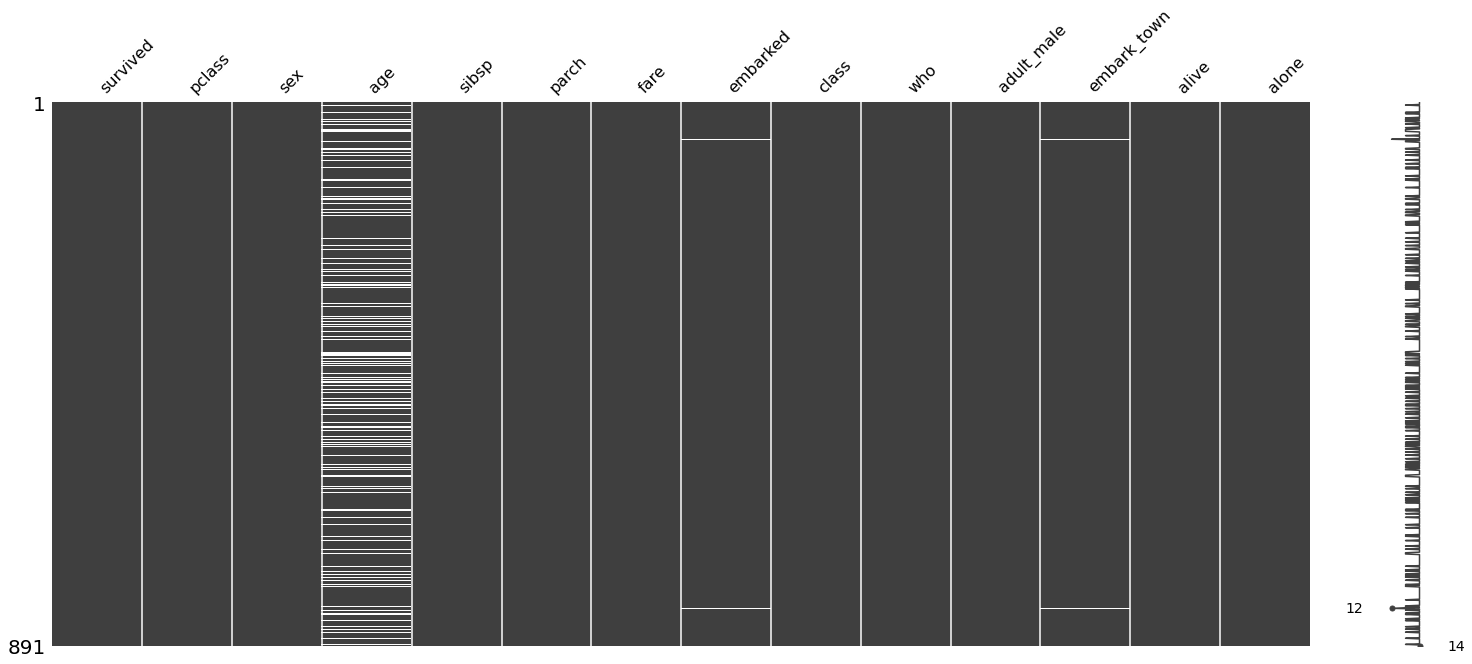

In [64]:
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis = 1)
msno.matrix(titanic)
plt.show()

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : number, string, np.nan (default) or None
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.
 |  
 |  strategy : string, default='mean'
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using th

In [140]:
imputer = SimpleImputer(missing_values = np.NaN, strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

ValueError: Cannot use most_frequent strategy with non-numeric data:
could not convert string to float: '2019-01-01'

# SimpleImputer Test


In [141]:
students = [[85, 'M', 'verygood'],
           [95, 'F', 'excellent'],
           [75, None,'good'],
           [np.NaN, 'M', 'average'],
           [70, 'M', 'good'],
           [np.NaN, None, 'verygood'],
           [92, 'F', 'verygood'],
           [98, 'M', 'excellent']]
dfstd = pd.DataFrame(students)
dfstd.columns = ['marks', 'gender', 'result']

In [142]:
dfstd

marks gender     result
0   85.0      M   verygood
1   95.0      F  excellent
2   75.0   None       good
3    NaN      M    average
4   70.0      M       good
5    NaN   None   verygood
6   92.0      F   verygood
7   98.0      M  excellent

In [163]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
dfstd.marks = imputer.fit_transform(dfstd['marks'].values.reshape(-1,1))[:,0]
dfstd

marks gender     result
0  85.000000      M   verygood
1  95.000000      F  excellent
2  75.000000   None       good
3  85.833333      M    average
4  70.000000      M       good
5  85.833333   None   verygood
6  92.000000      F   verygood
7  98.000000      M  excellent

In [164]:
imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
dfstd.gender = imputer.fit_transform(dfstd['gender'].values.reshape(-1,1))[:,0]
dfstd

marks gender     result
0  85.000000      M   verygood
1  95.000000      F  excellent
2  75.000000      M       good
3  85.833333      M    average
4  70.000000      M       good
5  85.833333      M   verygood
6  92.000000      F   verygood
7  98.000000      M  excellent

# 본문

In [167]:
df.head()

x1   x2   x3          x4   x5
0     1  0.1  1.0  2019-01-01  NaN
1     2  NaN  NaN  2019-01-02    B
2     3  NaN  3.0  2019-01-01    C
3  <NA>  0.4  4.0  2019-01-04    A
4     5  0.5  5.0  2019-01-05    B

In [178]:
df[['x1','x2','x3']]

x1   x2   x3
0     1  0.1  1.0
1     2  NaN  NaN
2     3  NaN  3.0
3  <NA>  0.4  4.0
4     5  0.5  5.0
5  <NA>  NaN  NaN
6     7  0.7  7.0
7     8  0.8  8.0
8     9  0.9  NaN

In [187]:
imputer = SimpleImputer(strategy="most_frequent")

In [188]:
df[['x1','x2','x3']] = pd.DataFrame(imputer.fit_transform(df[['x1','x2','x3']]), columns=df[['x1','x2','x3']].columns)
df[['x4','x5']] = pd.DataFrame(imputer.fit_transform(df[['x4','x5']]), columns = df[['x4','x5']].columns)
df

x1   x2   x3          x4 x5
0  1.0  0.1  1.0  2019-01-01  B
1  2.0  0.1  1.0  2019-01-02  B
2  3.0  0.1  3.0  2019-01-03  C
3  1.0  0.4  4.0  2019-01-04  A
4  5.0  0.5  5.0  2019-01-05  B
5  1.0  0.1  1.0  2019-01-06  C
6  7.0  0.7  7.0  2019-01-01  A
7  8.0  0.8  8.0  2019-01-08  B
8  9.0  0.9  1.0  2019-01-09  C

# 타이타닉 데이터로 돌아와서

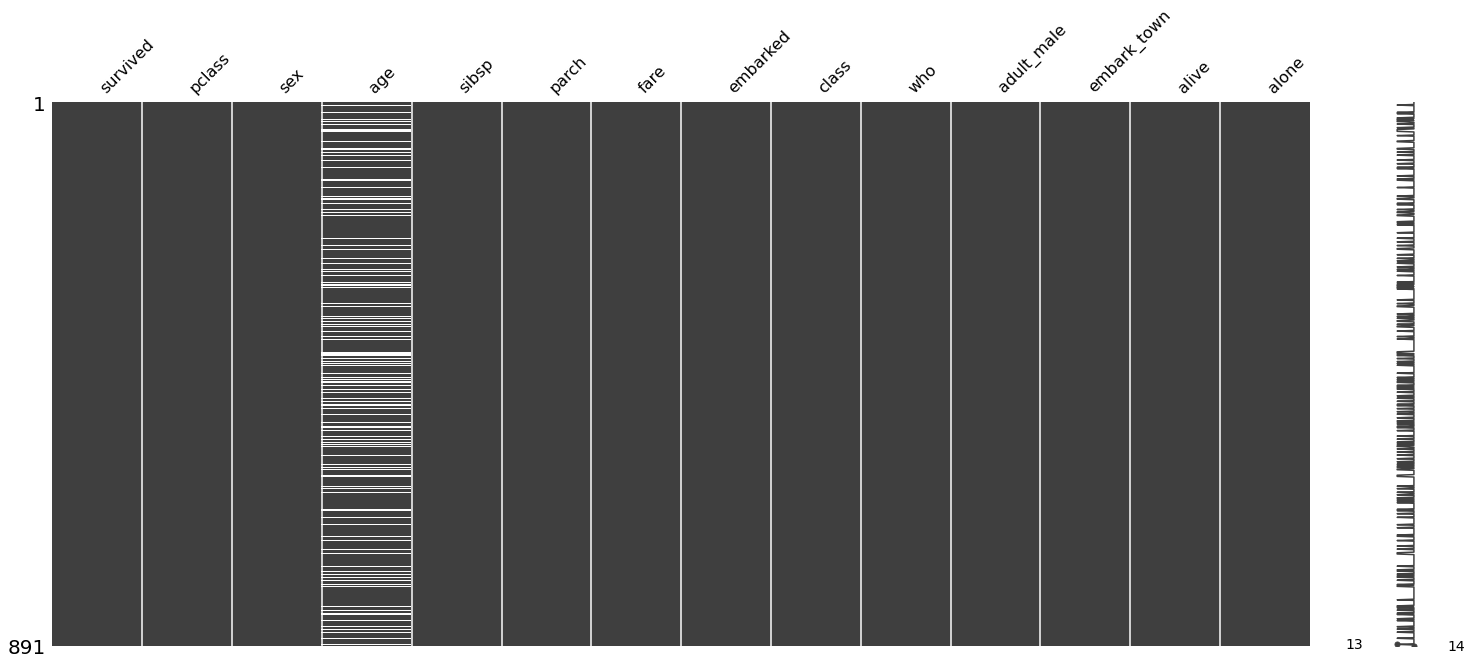

In [197]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

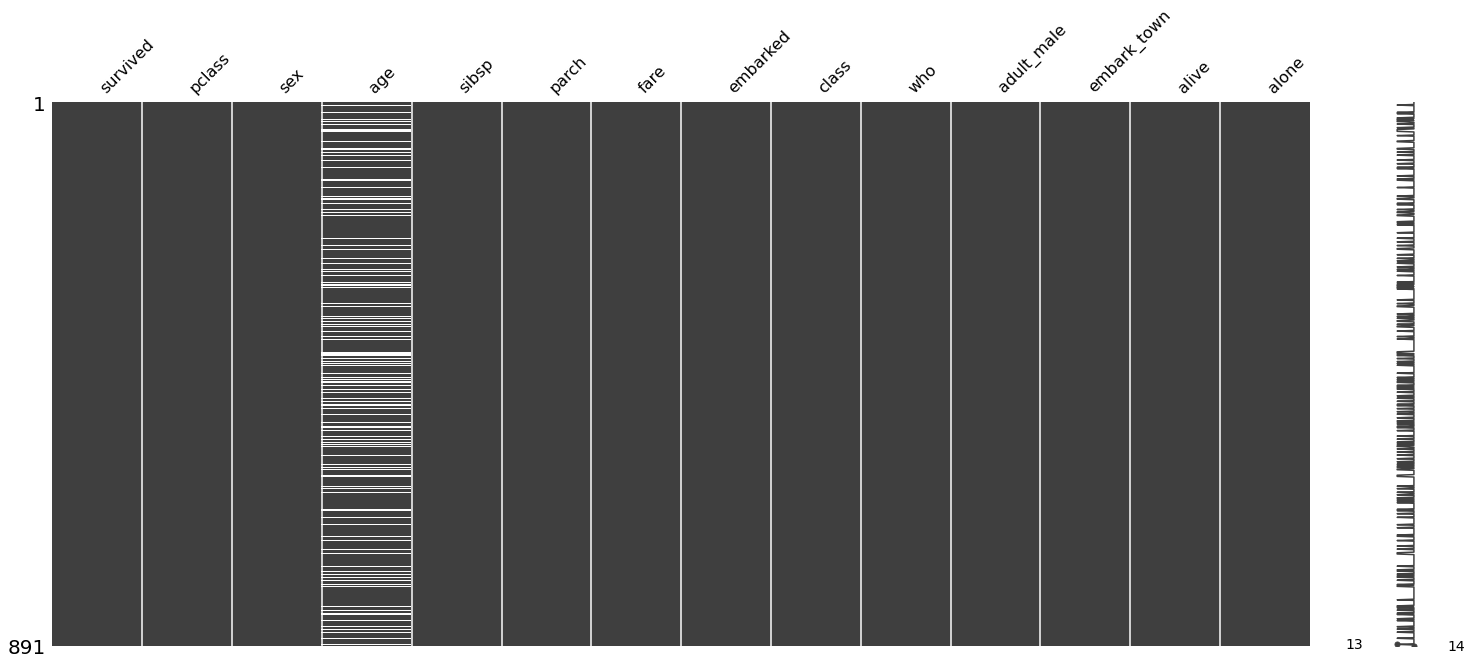

In [198]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

In [200]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

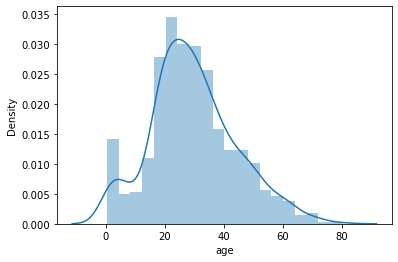

In [202]:
sns.distplot(titanic.age)

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current

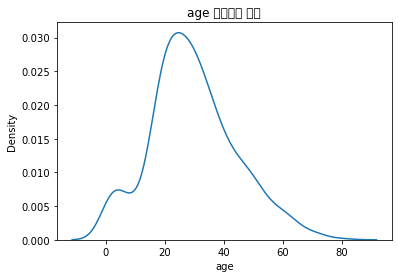

In [199]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

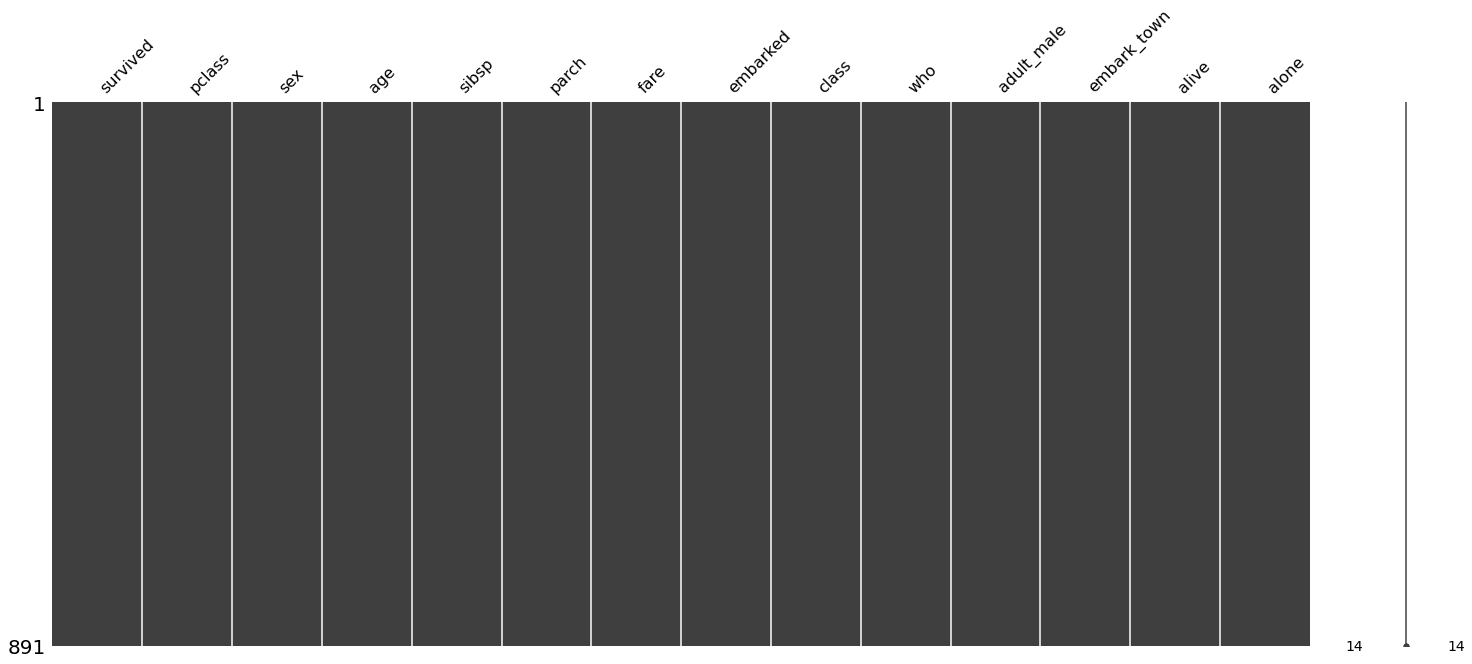

In [203]:
imputer_age = SimpleImputer(strategy='median')
titanic["age"] = pd.DataFrame(imputer_age.fit_transform(titanic[["age"]]))

msno.matrix(titanic)
plt.show()